# Leabra Demo

In this demo, we will walk through how a user can use the squat dectection neural network. This convolutional network will analyze images that were taken by the user to detect if the user is doing a squat in the current image or not.

First let's go through the tools that are needed to use the demo:

This notebook utilizes the opencv-python library to open and load in the user's images. This library is fairly straightforward but it has a cavet that will be disussed later. We need Tensorflow in order to create the model and load in the pre-trained weights and architecture. Numpy is required because both OpenCV and Tensorflow use numpy arrays heavily. The Glob library will make grabbing the files quick and easy. Finally, we will need MatPlotLib in order to plot the images that we are interested in.

In [1]:
import cv2
import numpy as np

from tensorflow import keras
from tensorflow.keras.preprocessing import image
import glob
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Model Creation

First, we need to create our intial model and load the pre-trained weights. We can use the keras.models.load_model() function that will allow us to load in the exact architecture and weights of the model that was used during testing. In the summary provided, the architecture of the model is displayed. The first two layers are the convolutional layers that are responsible for feature detection. This is followed by a batch normalization layer, which will normalize all the values from the convolution operations and provide better performance from the model. We then use the max pooling layer that will help extract the more prevaliant features. We then pass the the filters through a dropout layer and onto a dense network to make the final prediction.

In [2]:
squat_model = keras.models.load_model('demo/model')
squat_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 196, 196, 96)      7296      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 193, 193, 128)     196736    
_________________________________________________________________
batch_normalization (BatchNo (None, 193, 193, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

# Data Capture

The next step is to load in the images. 

Here is where OpenCV comes in. We can use OpenCV's function imread() to pass in the filepath to the images, and read in each individual image and store it in a numpy array. The cavet with working with OpenCV is that this library works with color channels differently than most libraries. OpenCV's color channels are in the order of blue, green, red but our network was trained on red, green, blue color channels, so we need to use OpenCV's cvtColor() function to convert BGR color channel to RGB color channels. We can also resize the images to a size that the network will accept at the same time.

In [3]:
files = glob.glob("demo/squat/*.jpg")
img_arr = np.array([cv2.cvtColor(cv2.resize(cv2.imread(fname),(200,200),cv2.INTER_AREA),cv2.COLOR_BGR2RGB) for fname in files], dtype='float32') 
img_arr.shape

(14, 200, 200, 3)

In [4]:
files = glob.glob("demo/not_squat/*.jpg")
img_arr2 = np.array([cv2.cvtColor(cv2.resize(cv2.imread(fname),(200,200),cv2.INTER_AREA),cv2.COLOR_BGR2RGB) for fname in files], dtype='float32') 
img_arr2.shape

(31, 200, 200, 3)

# Predictions!

Now that we have our model created and our data ready to go, we can now pass the image array to the the network by using the predict() function.

In [5]:
predictions = squat_model.predict(img_arr)
predictions2 = squat_model.predict(img_arr2)

# Results

As you can see the neural network is able to accurately predict (most of the time) weather or not it is seeing the user do a squat!

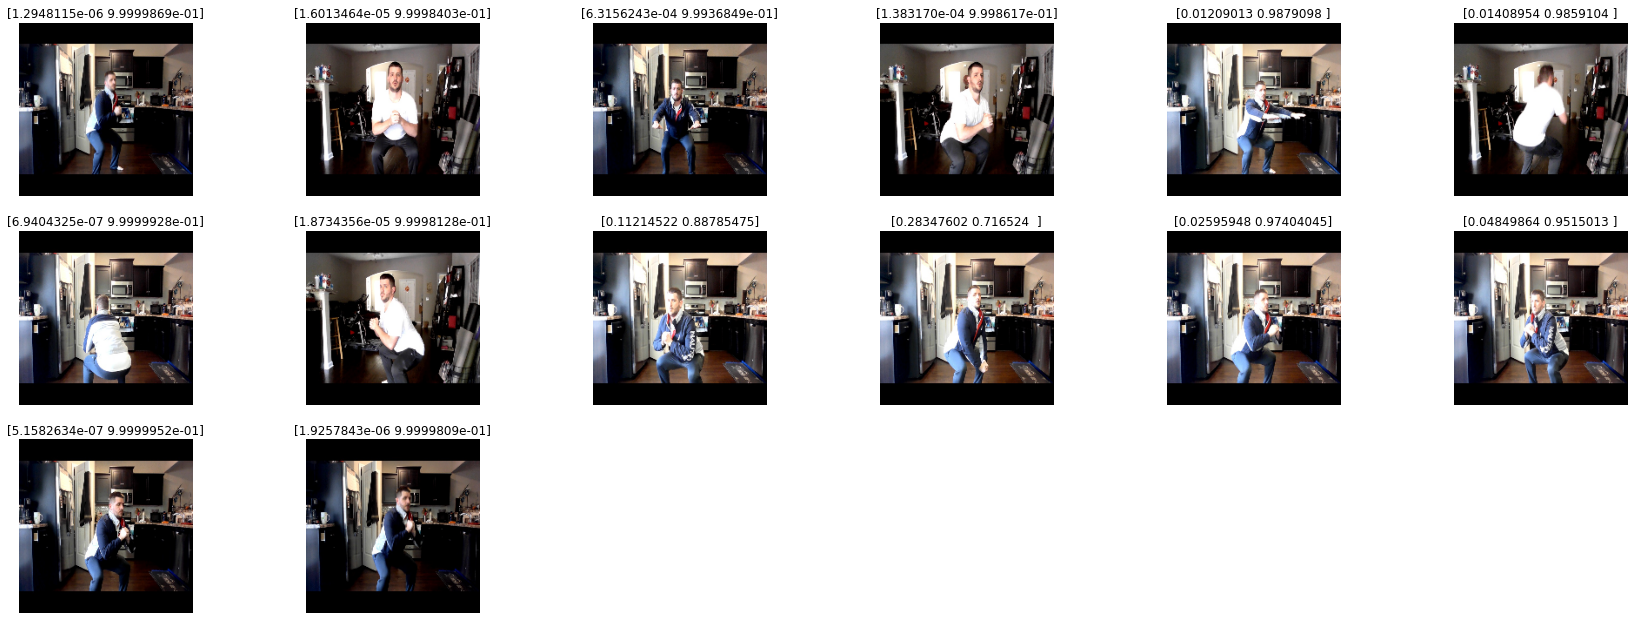

In [6]:
# Squat predictions
warnings.filterwarnings('ignore')
plt.figure(figsize=(30,30))
for images in img_arr:
    for i in range(len(img_arr)):
        ax = plt.subplot(8,6,i+1)
        plt.imshow(img_arr[i].astype('uint8'))
        plt.title(predictions[i])
        plt.axis("off")

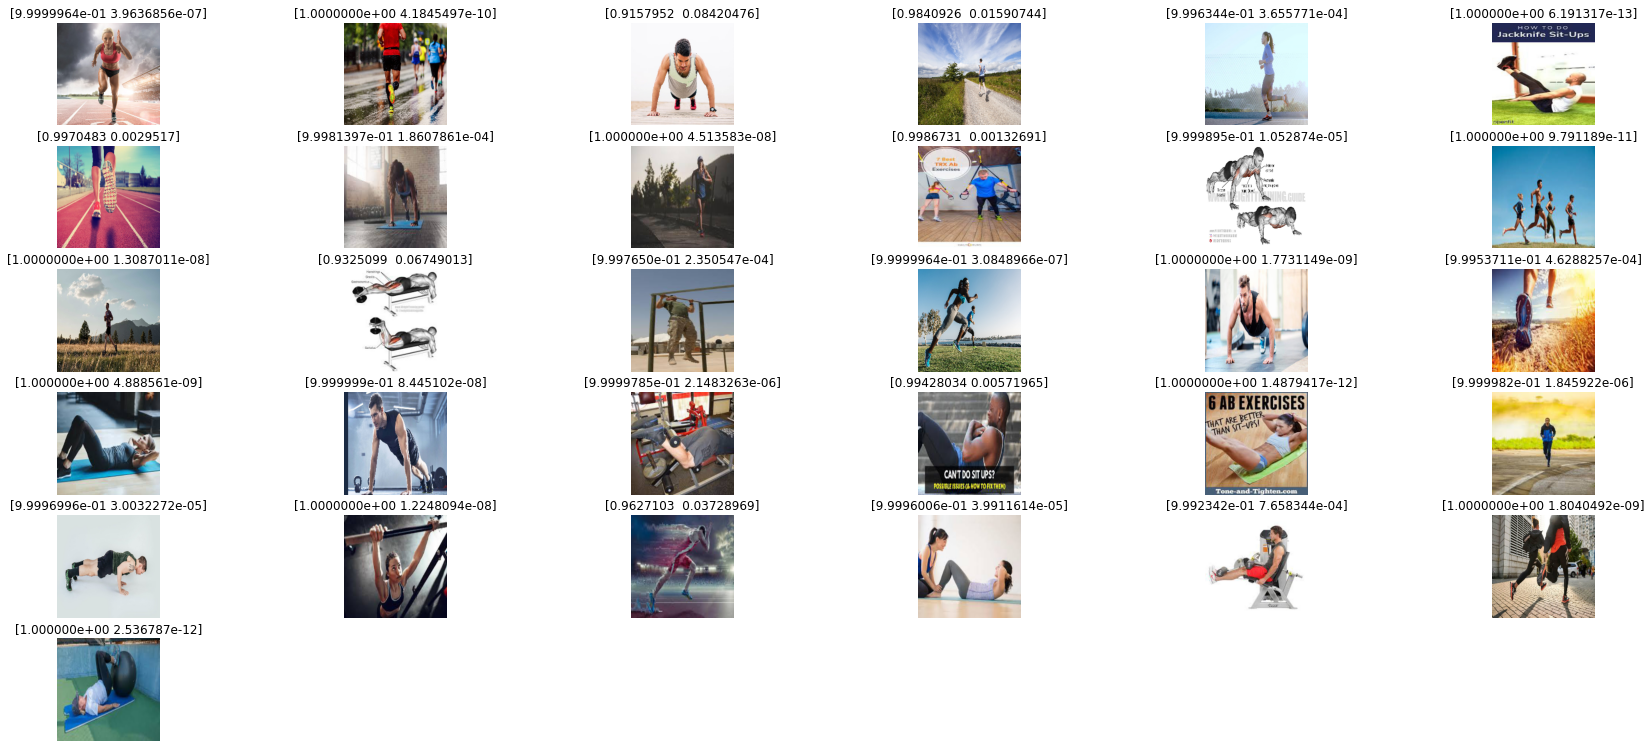

In [7]:
# Non-squat predictions.

plt.figure(figsize=(30,20))
for images in img_arr2:
    for i in range(len(img_arr2)):
        ax = plt.subplot(9,6,i+1)
        plt.imshow(img_arr2[i].astype('uint8'))
        plt.title(predictions2[i])
        plt.axis("off")